# AMAT503:  Lecture 07

January 29, 2018.

Michael Lamoureux

# HEADS' UP!

I will be using [Jupyter notebooks](https://jupyter.org) in this classroom, to combine text, math, and graphics. 

Students can access Jupyter at [ucalgary.syzygy.ca](https://ucalgary.syzygy.ca)

An eBook on how to use syzygy is here: [intro.syzygy.ca](http://intro.syzygy.ca)

Lecture notes, code, assignments, etc are available on a git repo: [github.com/mlamoureux](https://github.com/mlamoureux)

The textbnook for the course is available electronically
[here](https://ucalgary.summon.serialssolutions.com/#!/#!%2Fsearch%3FbookMark=ePnHCXMwhZ3bCoJAEIYNvCjrGcq6CLoQFMLoNjN6gO4H6QBSWLRrh7fvH2ddC4QuxQ_Fw87-M7v7r-e4yFuPHXFTYoMxiNIYSbV43SxC_EMRdyEeV8mQFIlTMnQJOl9ogW5dIGGvc2RuPcdf52hBkJD-M-PNGLSvvzQdvs3AcfW9RDQdbdJdsg2MheubTAWEeBZXHLHXXiBEs6iByiIveOdjKvcR8YIWZChLhHZ2au87M-EzdUbIQTjSih6XahhT0c_zgR0Lq7ITslyyTPPMYKbC1FGfqkuZaZiUrhLId-gLgEMBZfCYbuI8QVFYjZPy9pmTVkC_dCvULKiyqL2VgbiIcrja03KI5h3PGfr3aj8nd5KS)

or [here](https://proquest-safaribooksonline-com.ezproxy.lib.ucalgary.ca/9780470183113?uicode=ucalgary).
Thanks to Phil for pointing this out. 


One of the links should take any student to the ucalgary login page and then to the web version of the book after they successfully login.

In [1]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from matplotlib.pyplot import *
from IPython.display import IFrame
from IPython.display import Audio, display

## Summary

- Python Wavelet Toolkit
- Haar transform
- Daubechies transform

I'm going to try something **dangerous**, and import pywt (the python wavelet toolkit) without any namespace. Yikes! This is not safe in general, but maybe it is okay for a small notebook.

In [4]:
from pywt import *

In [5]:
## We take the vector [1,2,3,4] and compute 4 basis coefficients
cA, cD = dwt([1, 2, 3, 4], 'db1')

In [6]:
cA

array([ 2.12132034,  4.94974747])

In [7]:
cD

array([-0.70710678, -0.70710678])

Let's try a simple sine wave, but with lots of points. 



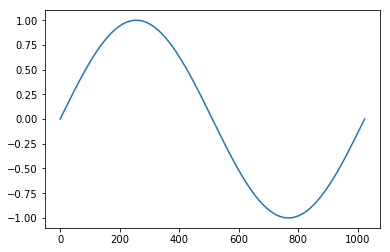

In [14]:
## Here is a real signal
Fs = 1024 # the sampling rate
t = linspace(0,1,Fs)  # time samples
x = sin(2*pi*t) 
plot(x)


Now we apply the wavelet transform, using Haar wavelets (Daubechies 1 or db1). Just one level.

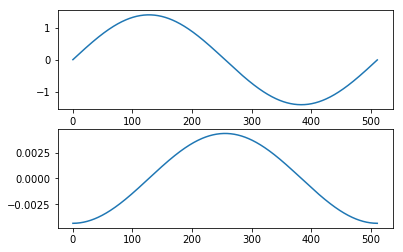

In [13]:
cA, cD = dwt(x, 'db1')
subplot(2,1,1)
plot(cA)
subplot(2,1,2)
plot(cD)

Now we iterate on the smoothed coefficients. 

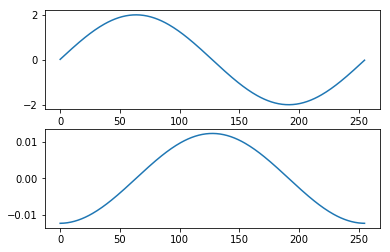

In [20]:
cA1 = cA
cA2, cD2 = dwt(cA1, 'db1')
subplot(2,1,1)
plot(cA2)
subplot(2,1,2)
plot(cD2)

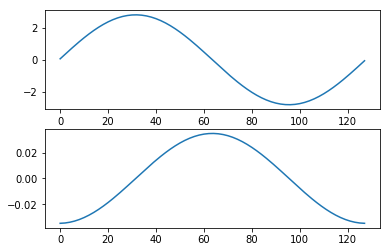

In [21]:
cA3, cD3 = dwt(cA2, 'db1')
subplot(2,1,1)
plot(cA3)
subplot(2,1,2)
plot(cD3)

## Multilevel decomp

Let's try a multilevel wavelet decompostion and see if we can make sense of it.



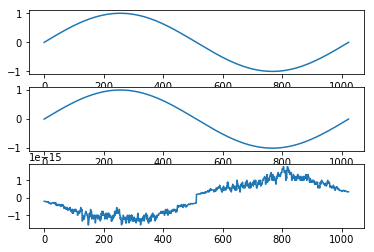

In [24]:
## Decomposition
coeffs = wavedec(x, 'db1')
## Reconstruction
y = waverec(coeffs, 'db1')

subplot(3,1,1)
plot(x)
subplot(3,1,2)
plot(y)
subplot(3,1,3)
plot(x-y)

## Coeff data structure.

The wavelet decomp function returns a data structure with a lot of information. Let's see if we can make sense of it.

In [25]:
coeffs

[array([ 0.]),
 array([ 20.35192235]),
 array([-0.02213104, -0.02213104]),
 array([-4.23256151,  4.21960328,  4.21960328, -4.23256151]),
 array([-2.03028731, -0.84393155,  0.83770452,  2.02771475,  2.02771475,
         0.83770452, -0.84393155, -2.03028731]),
 array([-0.76901923, -0.65265687, -0.43674157, -0.15420795,  0.15184776,
         0.43474139,  0.65132179,  0.76855291,  0.76855291,  0.65132179,
         0.43474139,  0.15184776, -0.15420795, -0.43674157, -0.65265687,
        -0.76901923]),
 array([-0.27647087, -0.26599289, -0.24527303, -0.21510908, -0.1766625 ,
        -0.13141364, -0.08110478, -0.02767303,  0.02682425,  0.08028868,
         0.13066165,  0.17600357,  0.21456858,  0.24487177,  0.26574633,
         0.27638849,  0.27638849,  0.26574633,  0.24487177,  0.21456858,
         0.17600357,  0.13066165,  0.08028868,  0.02682425, -0.02767303,
        -0.08110478, -0.13141364, -0.1766625 , -0.21510908, -0.24527303,
        -0.26599289, -0.27647087]),
 array([-0.0981469 , -0.0

In [26]:
size(coeffs)

11

In [27]:
size(coeffs[0])

1

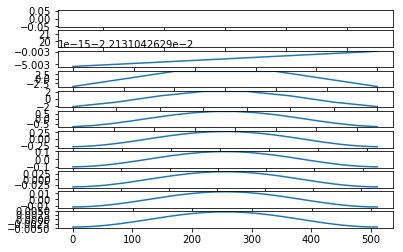

In [31]:
subplot(11,1,1)
plot(coeffs[0])
subplot(11,1,2)
plot(coeffs[1])
subplot(11,1,3)
plot(coeffs[2])
subplot(11,1,4)
plot(coeffs[3])
subplot(11,1,5)
plot(coeffs[4])
subplot(11,1,6)
plot(coeffs[5])
subplot(11,1,7)
plot(coeffs[6])
subplot(11,1,8)
plot(coeffs[7])
subplot(11,1,9)
plot(coeffs[8])
subplot(11,1,10)
plot(coeffs[9])
subplot(11,1,11)
plot(coeffs[10])


## Things to notice:
- there are 11 arrays outputted, of difference sizes.
- first two are length 1, last one is length 512
- sizes are 1,1,2,4,8,16,32,64,128,256
- this adds up to 1024, the original size of our input vector
- the outputs more or less all look like cosines. So they are the output of differencing filters, applied to the sine.
- So the recursive form always is applied to the output of the smoother at each stage (not the differencer).


## Energy

How much energy is in the coefficients?

In [36]:
for k in range(11):
    print(linalg.norm(coeffs[k]))

0.0
20.3519223533
0.0312980206356
8.45217473305
4.39264452744
2.21757810391
1.11145958704
0.556064033837
0.27807381019
0.139042129667
0.0695217179181


## Energy
How much enerrgy was in the original signal

In [37]:
linalg.norm(x)

22.616365755797283

## Hmm
That doesn't seem like emough. Lots more energy in the coefficients.

Or is it?

Remember, we have to sum the squares and take a square root. Because we are using the L2 norm.

In [40]:
## Do a sum of squares of the coefficients

ss = 0
for k in range(11):
    ss = ss +linalg.norm(coeffs[k])**2
    
sqrt(ss)

22.616365755797293

## Yay!!

Energy in x is the same as the total energy in the coefficients.

## Approx reconstruction.

Let's zero out a bunch of the coefficients that were small anyway. Then reconstruct.

Try indices 2,6,7,8,9,10.



In [41]:
for k in [2,6,7,8,9,10]:
    print(k)

2
6
7
8
9
10


In [42]:
for k in [2,6,7,8,9,10]:
    coeffs[k] = 0*coeffs[k]

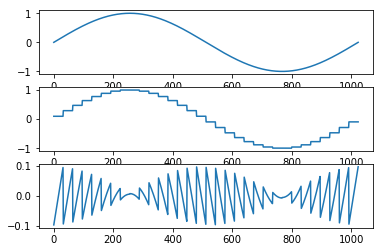

In [43]:
## Reconstruction
y = waverec(coeffs, 'db1')

subplot(3,1,1)
plot(x)
subplot(3,1,2)
plot(y)
subplot(3,1,3)
plot(x-y)

Well, it's kind of a crappy reconstruction. It looks like a piecewise constant approximation of the sine wave. You can certainly see what the errors are.

In [44]:
for k in range(11):
    print(linalg.norm(coeffs[k]))

0.0
20.3519223533
0.0
8.45217473305
4.39264452744
2.21757810391
0.0
0.0
0.0
0.0
0.0


Let's try keeping coefficent number 6, since that was the biggest one of all the ones we threw out last time.

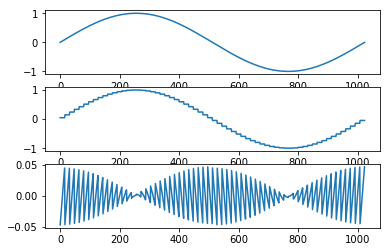

In [46]:
## Decomposition
coeffs = wavedec(x, 'db1')

for k in [2,7,8,9,10]:
    coeffs[k] = 0*coeffs[k]
    
## Approximate Reconstruction
y = waverec(coeffs, 'db1')

subplot(3,1,1)
plot(x)
subplot(3,1,2)
plot(y)
subplot(3,1,3)
plot(x-y)

Okay, it's better. Still see error, but not too much.

What if we foolishly removed a big coefficient, like number 1?

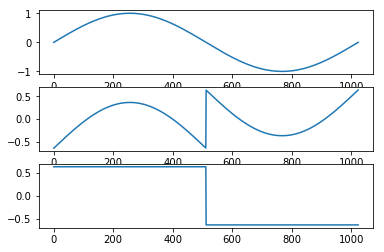

In [47]:
## Decomposition
coeffs = wavedec(x, 'db1')

for k in [1]:
    coeffs[k] = 0*coeffs[k]
    
## Approximate Reconstruction
y = waverec(coeffs, 'db1')

subplot(3,1,1)
plot(x)
subplot(3,1,2)
plot(y)
subplot(3,1,3)
plot(x-y)